In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweets-sentiment-analysis/vocab.py
/kaggle/input/tweets-sentiment-analysis/vocab.json
/kaggle/input/tweets-sentiment-analysis/train_data.csv
/kaggle/input/tweets-sentiment-analysis/test_data.csv
/kaggle/input/tweets-sentiment-analysis/Exploring Data.ipynb
/kaggle/input/glove6b50dtxt/glove.6B.50d.txt
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt


In [2]:
train_csv_path="/kaggle/input/tweets-sentiment-analysis/train_data.csv"
test_csv_path="/kaggle/input/tweets-sentiment-analysis/test_data.csv"
glove_path50="/kaggle/input/glove6b50dtxt/glove.6B.50d.txt"
glove_path100="/kaggle/input/glove6b100dtxt/glove.6B.100d.txt"

In [3]:
df_train=pd.read_csv(train_csv_path)
df_test=pd.read_csv(test_csv_path)

# **SIMPLE LOGISTIC REGRESSION**

**Required Imports for Logistic Regression**

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.metrics import accuracy_score
import re

*Downloading Stopwords used in Stemming*

In [5]:
nltk.download('stopwords')
temp=stopwords.words("english")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Stemming function*

In [6]:
port_stemmer=PorterStemmer()
stopwords_list=stopwords.words("english")
def stemming(content):
    stemmed_content=re.sub("[^a-zA-Z]"," ",content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stemmer.stem(a) for a in stemmed_content if a not in stopwords_list]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

*Applying stemming on each sentence of the columns and storing in "Stemmed" column*

In [7]:
df_train["Stemmed"]=df_train["sentence"].apply(stemming)

Now X and y would be numpy arrays

In [8]:
X=df_train["Stemmed"].values
y=df_train["sentiment"].values

In [9]:
from sklearn.model_selection import train_test_split

X_train_log,X_val_log,y_train_log,y_val_log=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

**Deleting some variables for conserving RAM**

In [10]:
import gc
del X,y
gc.collect()

0

In [11]:
vectorizer=TfidfVectorizer()

In [12]:
X_train_log=vectorizer.fit_transform(X_train_log)
X_val_log=vectorizer.transform(X_val_log)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model_log=LogisticRegression()
model_log.fit(X_train_log,y_train_log)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
X_val_prediction_log=model_log.predict(X_val_log)
val_accuracy=accuracy_score(y_val_log,X_val_prediction_log)
print(f"The accuracy score is {val_accuracy*100}%")
X_train_prediction_log=model_log.predict(X_train_log)
train_accuracy=accuracy_score(y_train_log,X_train_prediction_log)
print(f"The accuracy score of already trained data is {train_accuracy*100}%")

The accuracy score is 76.8618251611739%
The accuracy score of already trained data is 77.97618071162584%


# **Classification Report on test.csv(Completely Unseen Data) on Logistic Regression**

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df_test["Stemmed"]=df_test["sentence"].apply(stemming)
X_test_log=df_test["Stemmed"].values
y_test_log=df_test["sentiment"].values
X_test_log=vectorizer.transform(X_test_log)

y_test_pred_proba = model_log.predict(X_test_log)
print(f"Prediction probabilities shape: {y_test_pred_proba.shape}")
print(f"Sample probabilities: {y_test_pred_proba[:5].flatten()}")

# Convert probabilities to binary predictions (0 or 1)
y_test_pred = (y_test_pred_proba > 0.5).astype(int).flatten()
print(f"Sample predictions: {y_test_pred[:5]}")

# Calculate accuracy score
accuracy = accuracy_score(y_test_log, y_test_pred)
print(f"\nTesting Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Additional metrics
print("\n=== Classification Report ===")
print(classification_report(y_test_log, y_test_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test_log, y_test_pred))

# Show prediction distribution
unique, counts = np.unique(y_test_pred, return_counts=True)
print(f"\n=== Prediction Distribution ===")
for pred, count in zip(unique, counts):
    print(f"Class {pred}: {count} samples ({count/len(y_test_pred)*100:.1f}%)")

Prediction probabilities shape: (359,)
Sample probabilities: [1 1 1 0 0]
Sample predictions: [1 1 1 0 0]

Testing Accuracy: 0.8050 (80.50%)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       177
           1       0.79      0.84      0.81       182

    accuracy                           0.81       359
   macro avg       0.81      0.80      0.80       359
weighted avg       0.81      0.81      0.80       359


=== Confusion Matrix ===
[[137  40]
 [ 30 152]]

=== Prediction Distribution ===
Class 0: 167 samples (46.5%)
Class 1: 192 samples (53.5%)


# **Naive Bayes Classifier Model + it's Classification Report**

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.metrics import accuracy_score
import re
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
temp=stopwords.words("english")

port_stemmer=PorterStemmer()
stopwords_list=stopwords.words("english")
def stemming(content):
    stemmed_content=re.sub("[^a-zA-Z]"," ",content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stemmer.stem(a) for a in stemmed_content if a not in stopwords_list]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

df_train["Stemmed"]=df_train["sentence"].apply(stemming)

X=df_train["Stemmed"].values
y=df_train["sentiment"].values

vectorizer=TfidfVectorizer()


X_train_nb, X_val_nb, y_train_nb, y_val_nb = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_nb=vectorizer.fit_transform(X_train_nb)
X_val_nb=vectorizer.transform(X_val_nb)

''' This is the only part different. Instead of logistic regression, we tried out naive_bayes'''

from sklearn.naive_bayes import MultinomialNB

model_nb=MultinomialNB()
model_nb.fit(X_train_nb,y_train_nb)

X_val_prediction_nb=model_nb.predict(X_val_nb)
val_accuracy=accuracy_score(y_val_nb,X_val_prediction_nb)
print(f"The accuracy score is {val_accuracy*100}%")
X_train_prediction_nb=model_nb.predict(X_train_nb)
train_accuracy=accuracy_score(y_train_nb,X_train_prediction_nb)
print(f"The accuracy score of already trained data is {train_accuracy*100}%")

df_test["Stemmed"]=df_test["sentence"].apply(stemming)
X_test_nb=df_test["Stemmed"].values
y_test_nb=df_test["sentiment"].values
X_test_nb=vectorizer.transform(X_test_nb)

y_test_pred_proba = model_nb.predict_proba(X_test_nb)[:, 1]  # Assuming binary classification, probability for class 1
print(f"Prediction probabilities shape: {y_test_pred_proba.shape}")
print(f"Sample probabilities: {y_test_pred_proba[:5]}")

# Convert probabilities to binary predictions (0 or 1)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)
print(f"Sample predictions: {y_test_pred[:5]}")

# Calculate accuracy score
accuracy = accuracy_score(y_test_nb, y_test_pred)
print(f"\nTesting Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Additional metrics
print("\n=== Classification Report ===")
print(classification_report(y_test_nb, y_test_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test_nb, y_test_pred))

# Show prediction distribution
unique, counts = np.unique(y_test_pred, return_counts=True)
print(f"\n=== Prediction Distribution ===")
for pred, count in zip(unique, counts):
    print(f"Class {pred}: {count} samples ({count/len(y_test_pred)*100:.1f}%)")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The accuracy score is 75.04749093653112%
The accuracy score of already trained data is 78.2320904214308%
Prediction probabilities shape: (359,)
Sample probabilities: [0.59509242 0.65320244 0.52187408 0.3679503  0.46560172]
Sample predictions: [1 1 1 0 0]

Testing Accuracy: 0.7967 (79.67%)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       177
           1       0.80      0.79      0.80       182

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359


=== Confusion Matrix ===
[[142  35]
 [ 38 144]]

=== Prediction Distribution ===
Class 0: 180 samples (50.1%)
Class 1: 179 samples (49.9%)


# **Info-graphic plots on Logistic Regression and Naive-Bayes**

/tmp/ipykernel_36/2332585547.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


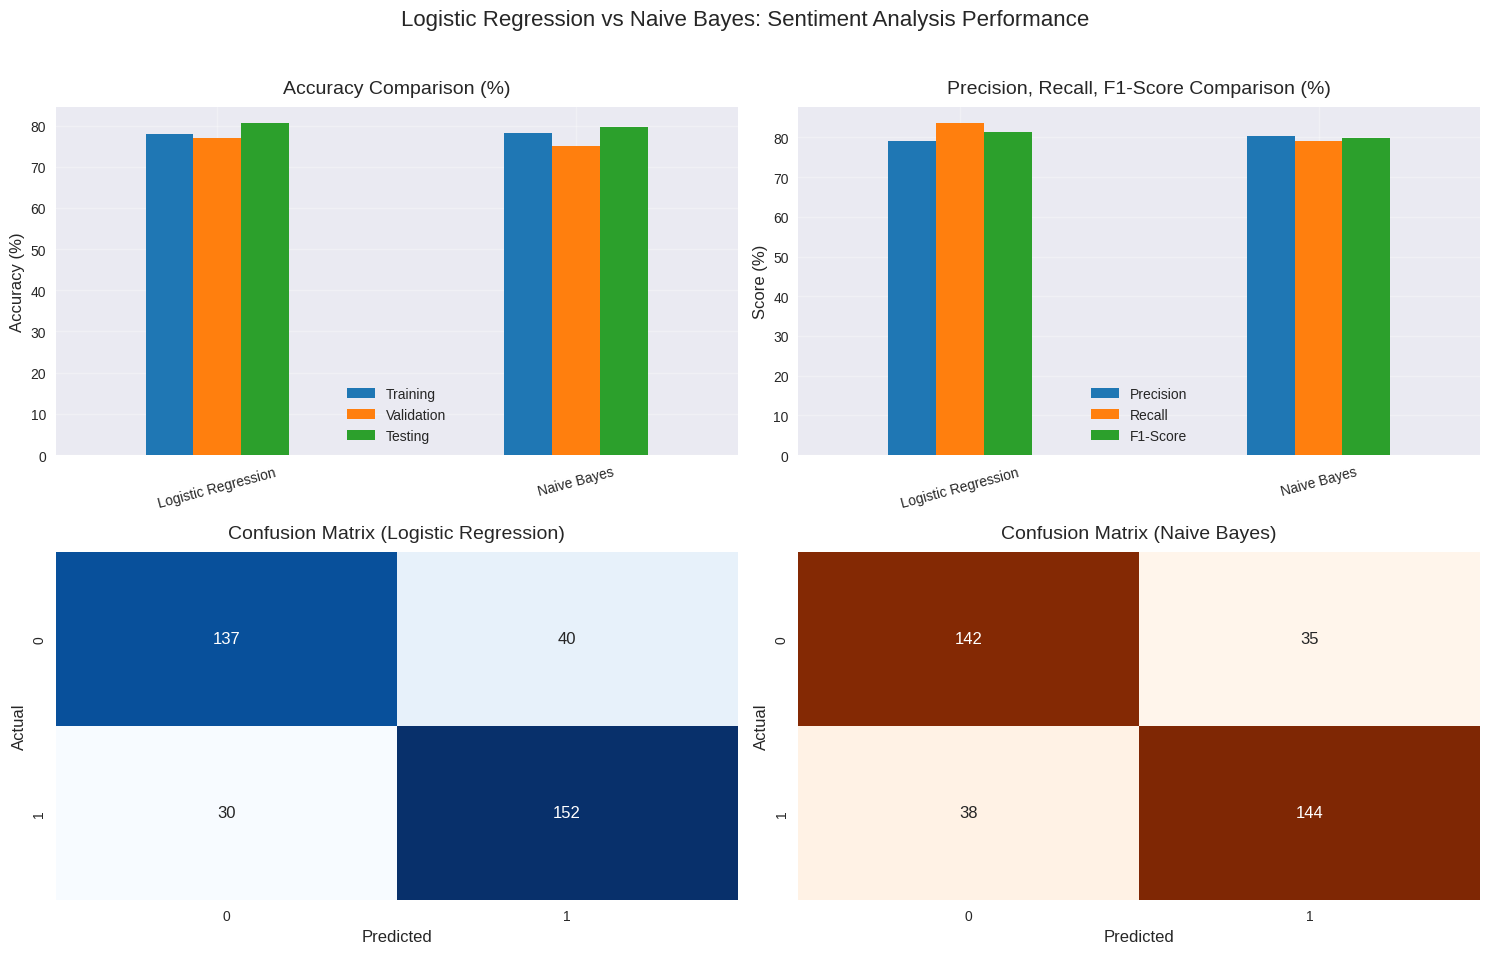

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Ensure matplotlib inline mode for Jupyter Notebook
%matplotlib inline

# Assuming the following variables are available from your previous code:
# For Logistic Regression: X_train_log, X_val_log, X_test_log, y_train_log, y_val_log, y_test_log, model_log
# For Naive Bayes: X_train_nb, X_val_nb, X_test_nb, y_train_nb, y_val_nb, y_test_nb, model_nb
# These should be generated from your provided code with train-val-test splits

# Calculate metrics for Logistic Regression
train_acc_log = accuracy_score(y_train_log, model_log.predict(X_train_log))
val_acc_log = accuracy_score(y_val_log, model_log.predict(X_val_log))
test_acc_log = accuracy_score(y_test_log, model_log.predict(X_test_log))
class_report_log = classification_report(y_test_log, model_log.predict(X_test_log), output_dict=True)
cm_log = confusion_matrix(y_test_log, model_log.predict(X_test_log))

# Calculate metrics for Naive Bayes
train_acc_nb = accuracy_score(y_train_nb, model_nb.predict(X_train_nb))
val_acc_nb = accuracy_score(y_val_nb, model_nb.predict(X_val_nb))
test_acc_nb = accuracy_score(y_test_nb, model_nb.predict(X_test_nb))
class_report_nb = classification_report(y_test_nb, model_nb.predict(X_test_nb), output_dict=True)
cm_nb = confusion_matrix(y_test_nb, model_nb.predict(X_test_nb))

# Prepare data for plotting
models = ['Logistic Regression', 'Naive Bayes']
accuracies = {
    'Training': [train_acc_log * 100, train_acc_nb * 100],
    'Validation': [val_acc_log * 100, val_acc_nb * 100],
    'Testing': [test_acc_log * 100, test_acc_nb * 100]
}

# Extract precision, recall, f1-score for class 1 (assuming binary classification)
metrics = {
    'Precision': [class_report_log['1']['precision'] * 100, class_report_nb['1']['precision'] * 100],
    'Recall': [class_report_log['1']['recall'] * 100, class_report_nb['1']['recall'] * 100],
    'F1-Score': [class_report_log['1']['f1-score'] * 100, class_report_nb['1']['f1-score'] * 100]
}

# Set up the figure for the infographic
plt.figure(figsize=(15, 10), facecolor='white')
plt.style.use('seaborn')

# 1. Bar plot for accuracies
plt.subplot(2, 2, 1)
acc_df = pd.DataFrame(accuracies, index=models)
acc_df.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.4)
plt.title('Accuracy Comparison (%)', fontsize=14, pad=10)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 2. Grouped bar plot for precision, recall, f1-score
plt.subplot(2, 2, 2)
metric_df = pd.DataFrame(metrics, index=models)
metric_df.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.4)
plt.title('Precision, Recall, F1-Score Comparison (%)', fontsize=14, pad=10)
plt.ylabel('Score (%)', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 3. Confusion Matrix for Logistic Regression
plt.subplot(2, 2, 3)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12})
plt.title('Confusion Matrix (Logistic Regression)', fontsize=14, pad=10)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# 4. Confusion Matrix for Naive Bayes
plt.subplot(2, 2, 4)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', cbar=False, annot_kws={'size': 12})
plt.title('Confusion Matrix (Naive Bayes)', fontsize=14, pad=10)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Adjust layout and add a main title
plt.suptitle('Logistic Regression vs Naive Bayes: Sentiment Analysis Performance', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.93])

# Display the plot in the notebook
plt.show()

In [19]:
del X,y,X_test_log,y_test_log,X_train_log,X_val_log,y_train_log,y_val_log,X_train_nb, X_val_nb, y_train_nb, y_val_nb,X_test_nb,y_test_nb,y_test_pred_proba,y_test_pred,df_train,df_test
gc.collect()

11667

# **Shifiting to Deep Learning Methods**

**First trial with 100 dimensional Glove Word Embeddings**

Adding words to dictionary. For every word, its corresponding vector in dictionary

In [20]:
words=dict()
def add_to_dict(d,filename):
    with open(filename,'r') as f:
        for line in f.readlines():
            line=line.split(' ')
            try:
                d[line[0]]=np.array(line[1:],dtype=float)
            except:
                continue
add_to_dict(words,glove_path100)

**Building Tokenizer and Lemmatizer**

In [21]:
import nltk
nltk.download("wordnet")

tokenizer=nltk.RegexpTokenizer(r"\w+") #only takes english alphabets. Not numerics, speical characters or commas
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer() #to reduce words to its Base form following dictionary

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Function taking a sentence as input returning its corresponding lemmatized list version**

In [22]:
def sentence_tokenizer(s):
    tokenized_s=tokenizer.tokenize(s)
    lowercased_s=[x.lower() for x in tokenized_s]
    lemmatized_s=[lemmatizer.lemmatize(y) for y in lowercased_s]
    useful_tokens=[t for t in lemmatized_s if t in words]
    return useful_tokens

**Every word in the  lemmatize sentence would get replaced by its corresponding word embedding by looking up in the "word" dict previously made**

In [23]:
def sentence_to_vectors(s,words=words):
    list_of_tokens=sentence_tokenizer(s)
    vectors=[]
    for t in list_of_tokens:
        if t not in words:
            continue
        token_vector=words[t]
        vectors.append(token_vector)
    return np.array(vectors)


**The Word embedded X and y are returned**

In [24]:
def df_to_Xy(df_train):
    y=df_train["sentiment"].values
    all_word_seq=[]
    for sentence in df_train["sentence"]:
        vec=sentence_to_vectors(sentence,words)
        if (vec.shape[0]==0):
            vec=np.zeros(shape=(1,100))
        all_word_seq.append(vec)
    return all_word_seq,y


**Since for every row/entry, the lemmatized sentence would have varied number of words, therefore different number of word embeddings. We find the maximum number of lemmatized words in a sentence to be 55, so keep the window size=55. If some entry has 45 lemmatized entries, we would pad it zero with added 10 more lemmatized words. We do all this because model takes fixed dimensional inputs**

In [25]:
def pad_X(X,desired_seq_len=55):
    for i,x in enumerate(X):
        curr_seq_len=x.shape[0]
        seq_len_diff=desired_seq_len-curr_seq_len
        pad=np.zeros(shape=(seq_len_diff,100))
        X[i]=np.concatenate([x,pad])
    return np.array(X)

**Time to apply the functions**

In [26]:
df_train=pd.read_csv(train_csv_path)

**After some experimentation, we realized, using the full train dataset for making X,y pair would blow up the RAM. Its better to use a fraction of the original df_train as df_train. Since, df_train itself is huge,using a fraction of it would still be a lot of data to train and validate on**

In [27]:
from sklearn.model_selection import train_test_split

def stratified_sample(df, target_col="sentiment", frac=0.15, random_state=42):
    """
    Returns a stratified sample of the dataframe based on the target column.
    
    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe
    target_col : str
        Column name for stratification (default: "sentiment")
    frac : float
        Fraction of rows to sample (default: 0.2 → 20%)
    random_state : int
        Random seed for reproducibility

    Returns
    -------
    pd.DataFrame
        Stratified sampled dataframe
    """
    _, sample_df = train_test_split(
        df,
        test_size=frac,
        stratify=df[target_col],
        random_state=random_state
    )
    return sample_df


In [28]:
df_train=stratified_sample(df_train)

In [29]:
X,y=df_to_Xy(df_train)
X=pad_X(X)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,          # 20% validation set
    stratify=y,             # stratify by labels
    random_state=42,        # reproducibility
)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_train: (182877, 55, 100)
y_train: (182877,)
X_val: (45720, 55, 100)
y_val: (45720,)


**To prevent RAM blowup**

In [31]:
import gc
del X,y,df_train,words
gc.collect()

7

# **Model1 training**

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import gc

# ------------------------
# Build model
# ------------------------
model1 = Sequential([
    LSTM(
        16, return_sequences=True, input_shape=(55, 100),
        kernel_regularizer=regularizers.l2(1e-4),
        recurrent_regularizer=regularizers.l2(1e-4),
        bias_regularizer=regularizers.l2(1e-4)
    ),
    Dropout(0.3),

    LSTM(
        16, return_sequences=True,
        kernel_regularizer=regularizers.l2(1e-4),
        recurrent_regularizer=regularizers.l2(1e-4),
        bias_regularizer=regularizers.l2(1e-4)
    ),
    Dropout(0.3),

    LSTM(
        16,
        kernel_regularizer=regularizers.l2(1e-4),
        recurrent_regularizer=regularizers.l2(1e-4),
        bias_regularizer=regularizers.l2(1e-4)
    ),
    Dropout(0.3),

    Dense(1, activation='sigmoid',
          kernel_regularizer=regularizers.l2(1e-4))
])

# ------------------------
# Compile with AUC metric
# ------------------------
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name="auc")]
)

# ------------------------
# Callbacks
# ------------------------
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,  # Increased patience
        restore_best_weights=True,
        verbose=1
    ),
    
    ModelCheckpoint(
        filepath='/kaggle/working/best_model.weights.h5',
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,  # Save only weights to reduce I/O
        verbose=1
    ),
    
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    
    # Memory cleanup callback
    tf.keras.callbacks.LambdaCallback(
        on_epoch_end=lambda epoch, logs: gc.collect()
    )
]

# ------------------------
# Train
# ------------------------
history = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

# ------------------------
# Load Best Weights before inference
# ------------------------
model1.load_weights('/kaggle/working/best_model.weights.h5')

# Now model is ready to use
loss, acc, auc = model1.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {acc:.4f}, Validation AUC: {auc:.4f}")


2025-08-19 18:22:50.874350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755627771.136443      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755627771.204882      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1755627783.948229      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(sha

Epoch 1/50


I0000 00:00:1755627802.279941     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


1428/1429 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6654 - auc: 0.7293 - loss: 0.6129
Epoch 1: val_loss improved from inf to 0.53899, saving model to /kaggle/working/best_model.weights.h5
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6655 - auc: 0.7294 - loss: 0.6128 - val_accuracy: 0.7424 - val_auc: 0.8225 - val_loss: 0.5390 - learning_rate: 0.0010
Epoch 2/50
1427/1429 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7488 - auc: 0.8244 - loss: 0.5300
Epoch 2: val_loss improved from 0.53899 to 0.51732, saving model to /kaggle/working/best_model.weights.h5
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7488 - auc: 0.8244 - loss: 0.5300 - val_accuracy: 0.7557 - val_auc: 0.8393 - val_loss: 0.5173 - learning_rate: 0.0010
Epoch 3/50
1425/1429 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7613 - auc: 0.8368 - loss: 0.5152
Epoch 3: val_loss improved from 0.51732 to 0.51319, saving model to /kaggle/working/best_model.weights.h5
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 20s

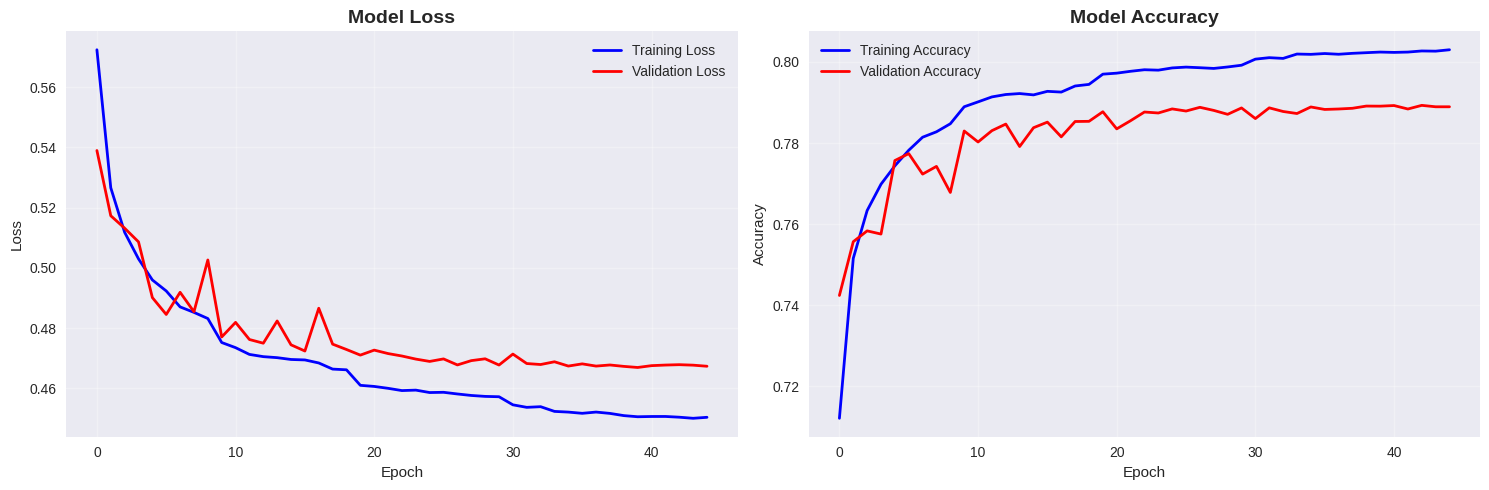


FINAL TRAINING METRICS SUMMARY
Final Training Loss:     0.4504
Final Validation Loss:   0.4673
Final Training Accuracy: 0.8030
Final Validation Accuracy: 0.7889


In [33]:
import matplotlib.pyplot as plt

# ------------------------
# Plot Training History
# ------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation loss
ax1.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
ax1.set_title('Model Loss', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training & validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
ax2.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Optional: Print final metrics summary
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print("\n" + "="*50)
print("FINAL TRAINING METRICS SUMMARY")
print("="*50)
print(f"Final Training Loss:     {final_train_loss:.4f}")
print(f"Final Validation Loss:   {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print("="*50)

**Although epoch 5 is optimal after which overfitting starts, at epoch 33, we hit the best val loss**

In [34]:
del X_train,X_val
gc.collect()

1587

In [35]:
words=dict()
add_to_dict(words,glove_path100)

In [36]:
df_test=pd.read_csv(test_csv_path)

In [37]:
X_test,y_test=df_to_Xy(df_test)

In [38]:
X_test=pad_X(X_test)

# **Classification Report of model1**

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on validation set
y_test_pred_proba = model1.predict(X_test)
print(f"Prediction probabilities shape: {y_test_pred_proba.shape}")
print(f"Sample probabilities: {y_test_pred_proba[:5].flatten()}")

# Convert probabilities to binary predictions (0 or 1)
y_test_pred = (y_test_pred_proba > 0.5).astype(int).flatten()
print(f"Sample predictions: {y_test_pred[:5]}")

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nValidation Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Additional metrics
print("\n=== Classification Report ===")
print(classification_report(y_test, y_test_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_test_pred))

# Show prediction distribution
unique, counts = np.unique(y_test_pred, return_counts=True)
print(f"\n=== Prediction Distribution ===")
for pred, count in zip(unique, counts):
    print(f"Class {pred}: {count} samples ({count/len(y_test_pred)*100:.1f}%)")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Prediction probabilities shape: (359, 1)
Sample probabilities: [0.66849405 0.9669016  0.68004245 0.36603966 0.8646581 ]
Sample predictions: [1 1 1 0 1]

Validation Accuracy: 0.8134 (81.34%)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       177
           1       0.82      0.80      0.81       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359


=== Confusion Matrix ===
[[146  31]
 [ 36 146]]

=== Prediction Distribution ===
Class 0: 182 samples (50.7%)
Class 1: 177 samples (49.3%)


# **Infographics on Model1**

/tmp/ipykernel_36/2428726723.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


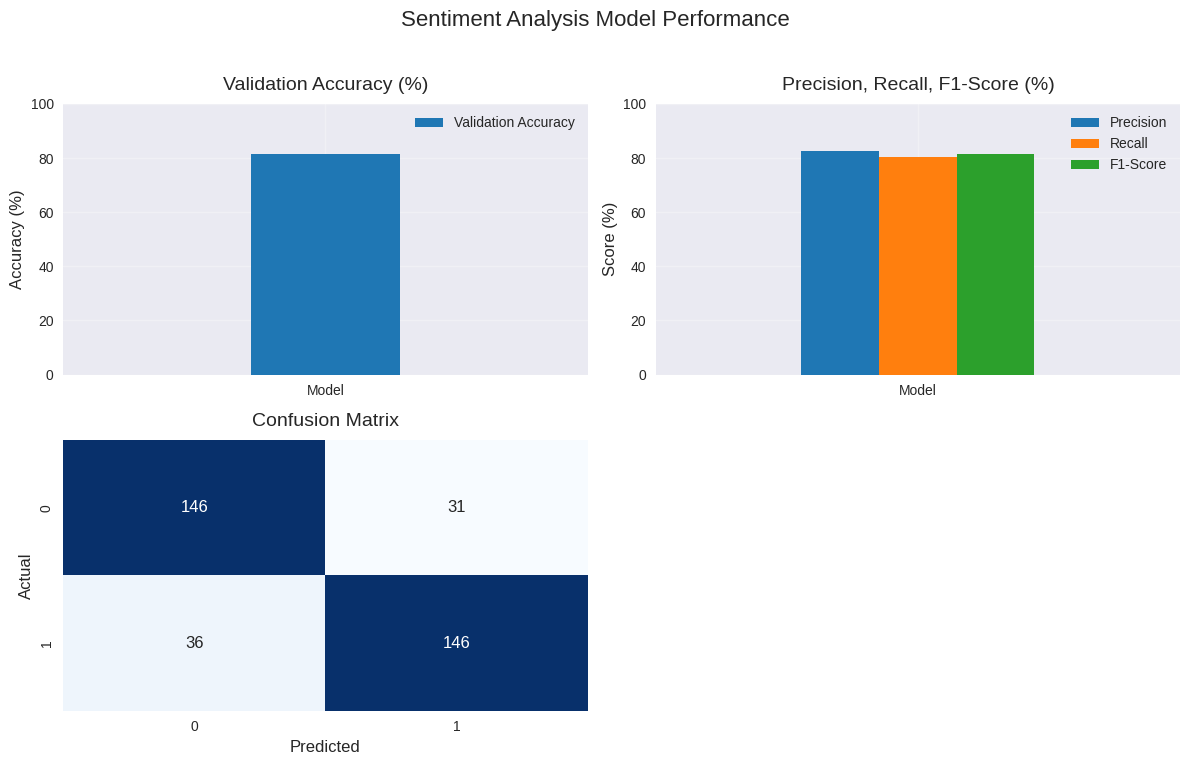

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure matplotlib inline mode for Jupyter Notebook
%matplotlib inline

# Calculate metrics (using variables from your code)
val_acc = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, output_dict=True)
cm = confusion_matrix(y_test, y_test_pred)

# Prepare data for plotting
metrics = {
    'Precision': [class_report['1']['precision'] * 100],
    'Recall': [class_report['1']['recall'] * 100],
    'F1-Score': [class_report['1']['f1-score'] * 100]
}
acc_data = {'Validation Accuracy': [val_acc * 100]}

# Set up the figure for the infographic
plt.figure(figsize=(12, 8), facecolor='white')
plt.style.use('seaborn')

# 1. Bar plot for validation accuracy
plt.subplot(2, 2, 1)
acc_df = pd.DataFrame(acc_data, index=['Model'])
acc_df.plot(kind='bar', ax=plt.gca(), color='#1f77b4', width=0.2)
plt.title('Validation Accuracy (%)', fontsize=14, pad=10)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)

# 2. Bar plot for precision, recall, f1-score
plt.subplot(2, 2, 2)
metric_df = pd.DataFrame(metrics, index=['Model'])
metric_df.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.4)
plt.title('Precision, Recall, F1-Score (%)', fontsize=14, pad=10)
plt.ylabel('Score (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, 100)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 3. Confusion Matrix
plt.subplot(2, 2, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12})
plt.title('Confusion Matrix', fontsize=14, pad=10)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Adjust layout and add a main title
plt.suptitle('Sentiment Analysis Model Performance', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.93])

# Display the plot in the notebook
plt.show()

**We realized that we could do better if we try to utilize the full dataset instead of using a fraction of it. The real challenge was the RAM bottleneck. We definetly needed a different approach. Therefore, we came up with embeddings being used as a layer in the model, instead of inserting them in train-val or test data itself ,causing the RAM to explode. We can also keep the embedding layer "trainable=True", so it could Fine-Tune itself over time getting trained**

In [41]:
%reset -f

# **Model2 with embedded layer**

**Fresh Imports**

In [42]:
import os
import gc
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers

**Configurations**

In [43]:
TRAIN_CSV = "/kaggle/input/tweets-sentiment-analysis/train_data.csv"
TEST_CSV  = "/kaggle/input/tweets-sentiment-analysis/test_data.csv"  
GLOVE_PATH = "/kaggle/input/glove6b50dtxt/glove.6B.50d.txt"

VOCAB_SIZE = 50000
OOV_TOKEN = "<OOV>" #this means out of vocabulary. in short, any word after the top 50,000 highest frequency, they are OOV
EMBED_DIM = 50
MAX_LEN = 55
BATCH_SIZE = 256    
EPOCHS = 6
SAMPLE_FRAC = None  # no sample frac this time. we will do complete dataset this time
RANDOM_STATE = 42

SAVE_MODEL_PATH = "/kaggle/working/bilstm_glove_fixed.h5"
SAVE_TOKENIZER_PATH = "/kaggle/working/tokenizer.json"

In [44]:
print("Loading train CSV:", TRAIN_CSV)
df = pd.read_csv(TRAIN_CSV, usecols=["sentence", "sentiment"])
df['sentence'] = df['sentence'].astype(str)

if SAMPLE_FRAC is not None and 0 < SAMPLE_FRAC < 1.0: #since no sample fraction, better to ignore this part
    from sklearn.model_selection import train_test_split as _tts
    _, df = _tts(df, test_size=SAMPLE_FRAC, stratify=df['sentiment'], random_state=RANDOM_STATE)

texts = df['sentence'].tolist() #getting the list of text
labels = df['sentiment'].values #got the numpy array of sentiments
print("Total samples loaded:", len(texts))

Loading train CSV: /kaggle/input/tweets-sentiment-analysis/train_data.csv
Total samples loaded: 1523975


**Setting up the Tokenizer**

In [45]:
print("Fitting tokenizer (VOCAB_SIZE=%d)..." % VOCAB_SIZE)
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(texts)
print("Tokenizer fitted. Full vocab size:", len(tokenizer.word_index))
vocab_size_effective = min(VOCAB_SIZE, len(tokenizer.word_index) + 1)
print("vocab_size_effective:", vocab_size_effective)

Fitting tokenizer (VOCAB_SIZE=50000)...
Tokenizer fitted. Full vocab size: 265770
vocab_size_effective: 50000


**The returned embedding matrix would be used in the Model's upper layer**

In [46]:
def build_embedding_matrix_from_glove(glove_path, tokenizer, vocab_size, embed_dim):
    vocab_size_effective = min(vocab_size, len(tokenizer.word_index) + 1)
    embedding_matrix = np.zeros((vocab_size_effective, embed_dim), dtype=np.float32)
    needed = {w for w, idx in tokenizer.word_index.items() if idx < vocab_size_effective}
    print(f"Need embeddings for {len(needed)} tokens (vocab_size_effective={vocab_size_effective})")
    found = 0
    with open(glove_path, 'r', encoding='utf8', errors='ignore') as f:
        for line in f:
            parts = line.rstrip().split(' ')
            if len(parts) < embed_dim + 1:
                continue
            w = parts[0]
            if w in needed:
                vec = np.asarray(parts[1:], dtype=np.float32)
                idx = tokenizer.word_index[w]
                if idx < vocab_size_effective:
                    embedding_matrix[idx] = vec
                    found += 1
    print(f"Found {found}/{len(needed)} vectors from GloVe.")
    return embedding_matrix, vocab_size_effective

print("Building embedding matrix from GloVe...")
embedding_matrix, vocab_size_effective = build_embedding_matrix_from_glove(GLOVE_PATH, tokenizer, VOCAB_SIZE, EMBED_DIM)
missing_count = np.sum(np.all(embedding_matrix == 0, axis=1))
print("Embedding rows entirely zero (including padding idx 0):", missing_count)

# Random-init missing rows (but keep index 0 as zero vector for padding)
rng = np.random.RandomState(12345)
zero_rows = np.where(np.all(embedding_matrix == 0, axis=1))[0]
zero_rows = zero_rows[zero_rows != 0]  # keep index 0 as zero (padding)
if zero_rows.size > 0:
    print("Random-init %d missing embedding rows (not including index 0)." % len(zero_rows))
    embedding_matrix[zero_rows] = rng.normal(0, 0.01, size=(len(zero_rows), EMBED_DIM)).astype(np.float32)


Building embedding matrix from GloVe...
Need embeddings for 49999 tokens (vocab_size_effective=50000)
Found 39288/49999 vectors from GloVe.
Embedding rows entirely zero (including padding idx 0): 10712
Random-init 10711 missing embedding rows (not including index 0).


**Building X and y**

In [47]:
print("Converting texts to sequences and padding to MAX_LEN=%d" % MAX_LEN)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post', dtype='int32')
# cap large indices to OOV index
oov_index = tokenizer.word_index.get(OOV_TOKEN, 1)
X[X >= vocab_size_effective] = oov_index
y = labels
print("X shape:", X.shape, "y shape:", y.shape)
del texts, sequences, labels
gc.collect()

Converting texts to sequences and padding to MAX_LEN=55
X shape: (1523975, 55) y shape: (1523975,)


0

**Train-val Split**

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)
print("Train/Val sizes:", X_train.shape[0], X_val.shape[0])
del X, y
gc.collect()

Train/Val sizes: 1219180 304795


0

**Building model**

In [49]:
print("Building model (mask_zero=False, LSTM returns last output)...")
model = Sequential([
    Embedding(input_dim=vocab_size_effective,
              output_dim=EMBED_DIM,
              weights=[embedding_matrix],
              input_length=MAX_LEN,
              trainable=True,    # set True later to fine-tune embeddings if desired
              mask_zero=False),   # IMPORTANT: do not create mask that might conflict with cuDNN
    Bidirectional(LSTM(128)),  # returns last output vector (no return_sequences)
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name="auc")])
model.summary()

# -------------------------
# 7) Callbacks
# -------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1),
    ModelCheckpoint(SAVE_MODEL_PATH, monitor='val_loss', save_best_only=True, verbose=1)
]

# -------------------------
# 8) Train (wrapped to catch TF runtime errors)
# -------------------------
print("Training...")
try:
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=1
    )
except Exception as e:
    print("ERROR during model.fit():")
    import traceback
    traceback.print_exc()
    raise

# Save tokenizer
with open(SAVE_TOKENIZER_PATH, 'w', encoding='utf-8') as f:
    f.write(tokenizer.to_json())
print("Tokenizer saved to", SAVE_TOKENIZER_PATH)
# Save model (ModelCheckpoint already saved best)
if not os.path.exists(SAVE_MODEL_PATH):
    model.save(SAVE_MODEL_PATH)
print("Model saved to", SAVE_MODEL_PATH)

Building model (mask_zero=False, LSTM returns last output)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,500,000 (9.54 MB)

 Trainable params: 2,500,000 (9.54 MB)

 Non-trainable params: 0 (0.00 B)

Training...
Epoch 1/6
4762/4763 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7724 - auc: 0.8513 - loss: 0.4785
Epoch 1: val_loss improved from inf to 0.40000, saving model to /kaggle/working/bilstm_glove_fixed.h5
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 100s 20ms/step - accuracy: 0.7724 - auc: 0.8513 - loss: 0.4784 - val_accuracy: 0.8190 - val_auc: 0.9005 - val_loss: 0.4000 - learning_rate: 0.0010
Epoch 2/6
4762/4763 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8274 - auc: 0.9071 - loss: 0.3881
Epoch 2: val_loss improved from 0.40000 to 0.39310, saving model to /kaggle/working/bilstm_glove_fixed.h5
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 95s 20ms/step - accuracy: 0.8274 - auc: 0.9071 - loss: 0.3881 - val_accuracy: 0.8238 - val_auc: 0.9064 - val_loss: 0.3931 - learning_rate: 0.0010
Epoch 3/6
4762/4763 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8410 - auc: 0.9194 - loss: 0.3627
Epoch 3: val_loss improved from 0.39310 to 0.38771, saving model to /kaggle/working/bilstm_glove_fixed.h5
4763/4763 ━━━

**Training history plotting and Classification Reports**

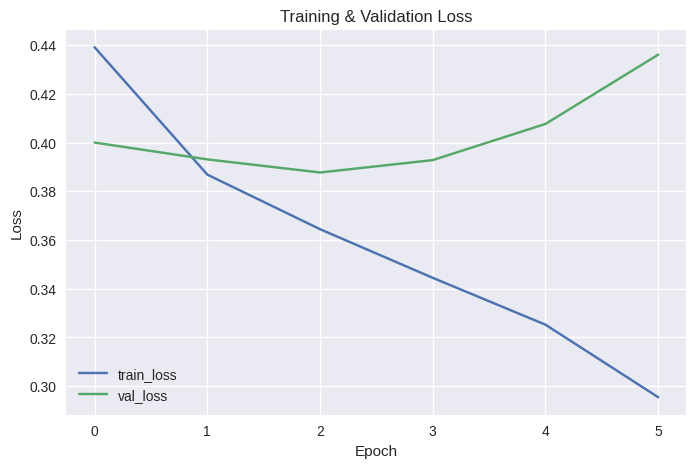

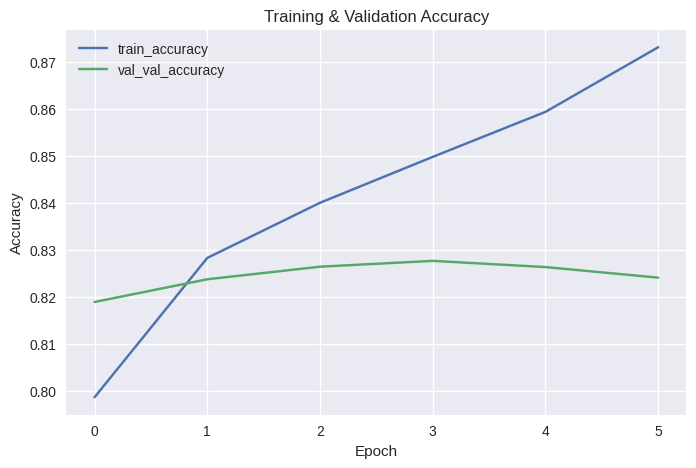

Generating reports for Train and Validation

=== Report for Train ===
Sample probs shape: (1219180,) sample probs (first5): [0.9987393  0.8836465  0.86890906 0.04102479 0.99848515]
Sample preds (first10): [1 1 1 0 1 1 0 0 0 1]

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.83      0.85    613647
           1       0.84      0.87      0.85    605533

    accuracy                           0.85   1219180
   macro avg       0.85      0.85      0.85   1219180
weighted avg       0.85      0.85      0.85   1219180

Confusion matrix:
 [[511999 101648]
 [ 79380 526153]]

=== Report for Validation ===
Sample probs shape: (304795,) sample probs (first5): [0.7289885  0.91613877 0.9790284  0.74329394 0.99667114]
Sample preds (first10): [1 1 1 1 1 0 0 0 0 1]

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.81      0.82    153412
           1       0.81      0.84      0.83   

In [50]:
hist = history.history
plt.figure(figsize=(8,5))
plt.plot(hist.get('loss', []), label='train_loss')
plt.plot(hist.get('val_loss', []), label='val_loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True); plt.show()

acc_key = 'accuracy' if 'accuracy' in hist else ('acc' if 'acc' in hist else None)
val_acc_key = 'val_accuracy' if 'val_accuracy' in hist else ('val_acc' if 'val_acc' in hist else None)
if acc_key and val_acc_key:
    plt.figure(figsize=(8,5))
    plt.plot(hist.get(acc_key, []), label='train_'+acc_key)
    plt.plot(hist.get(val_acc_key, []), label='val_'+val_acc_key)
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True); plt.show()

# -------------------------
# 10) Reports for Train / Val / Test
# -------------------------
def do_report(name, Xset, yset, model, threshold=0.5):
    print(f"\n=== Report for {name} ===")
    probs = model.predict(Xset, batch_size=1024, verbose=0)
    probs = np.array(probs).squeeze()
    if probs.ndim > 1 and probs.shape[1] > 1:
        preds = np.argmax(probs, axis=1)
    else:
        preds = (probs >= threshold).astype(int)
    print("Sample probs shape:", probs.shape, "sample probs (first5):", probs[:5])
    print("Sample preds (first10):", preds[:10])
    print("\nClassification report:\n")
    print(classification_report(yset, preds))
    print("Confusion matrix:\n", confusion_matrix(yset, preds))

print("Generating reports for Train and Validation")
do_report("Train", X_train, y_train, model)
do_report("Validation", X_val, y_val, model)

# Optional test evaluation (if TEST_CSV exists)
if os.path.exists(TEST_CSV):
    print("Found TEST_CSV, evaluating...")
    df_test = pd.read_csv(TEST_CSV, usecols=["sentence", "sentiment"])
    df_test['sentence'] = df_test['sentence'].astype(str)
    seqs_test = tokenizer.texts_to_sequences(df_test['sentence'].tolist())
    X_test = pad_sequences(seqs_test, maxlen=MAX_LEN, padding='post', truncating='post', dtype='int32')
    X_test[X_test >= vocab_size_effective] = oov_index
    y_test = df_test['sentiment'].values
    do_report("Test", X_test, y_test, model)
else:
    print("TEST_CSV not found; skipping test eval")

print("\nDone.")


/tmp/ipykernel_36/1823083377.py:57: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


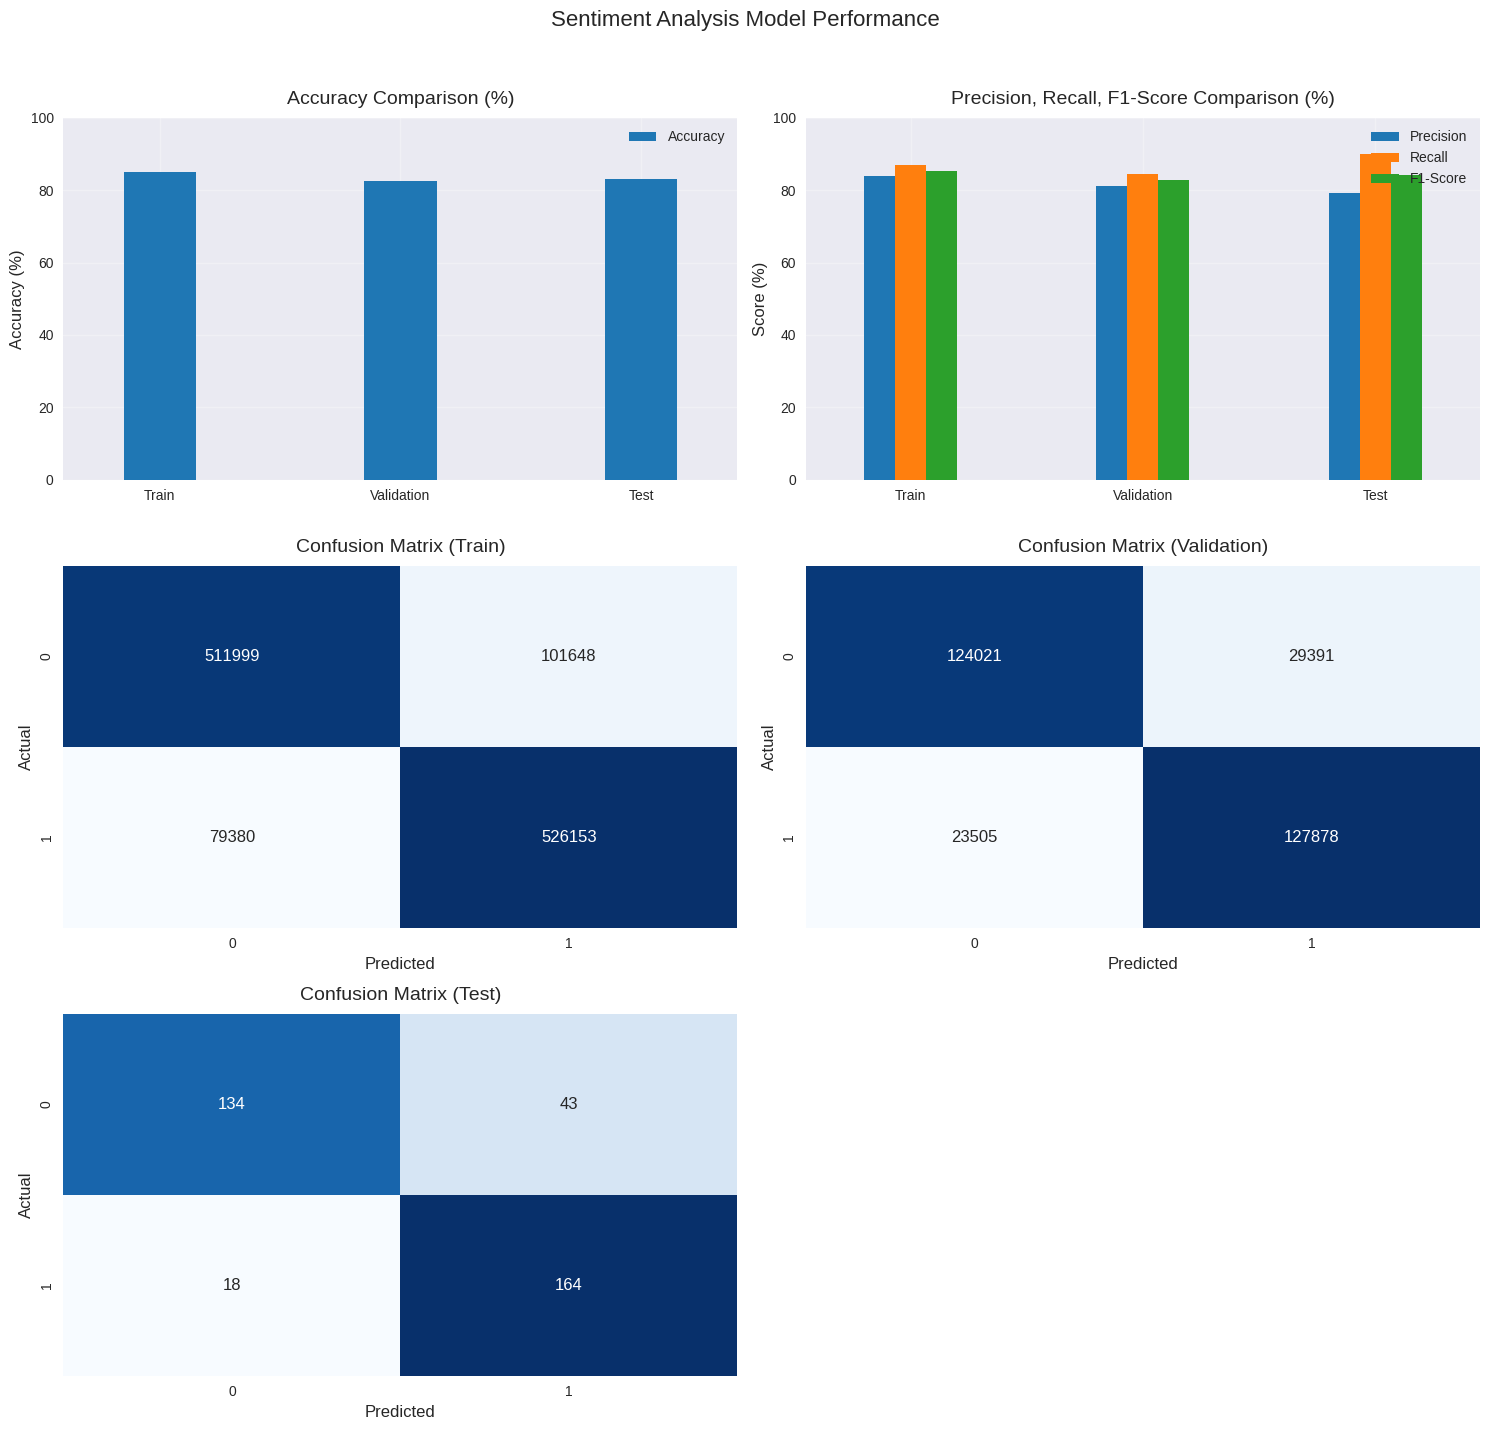

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure matplotlib inline mode for Jupyter Notebook
%matplotlib inline

# Modified do_report to return metrics for plotting
def do_report(name, Xset, yset, model, threshold=0.5):
    probs = model.predict(Xset, batch_size=1024, verbose=0)
    probs = np.array(probs).squeeze()
    if probs.ndim > 1 and probs.shape[1] > 1:
        preds = np.argmax(probs, axis=1)
    else:
        preds = (probs >= threshold).astype(int)
    acc = accuracy_score(yset, preds)
    class_report = classification_report(yset, preds, output_dict=True)
    cm = confusion_matrix(yset, preds)
    return acc, class_report, cm

# Collect metrics for Train and Validation
train_acc, train_report, train_cm = do_report("Train", X_train, y_train, model)
val_acc, val_report, val_cm = do_report("Validation", X_val, y_val, model)

# Collect metrics for Test if available
test_acc, test_report, test_cm = None, None, None
import os
if os.path.exists(TEST_CSV):
    df_test = pd.read_csv(TEST_CSV, usecols=["sentence", "sentiment"])
    df_test['sentence'] = df_test['sentence'].astype(str)
    seqs_test = tokenizer.texts_to_sequences(df_test['sentence'].tolist())
    X_test = pad_sequences(seqs_test, maxlen=MAX_LEN, padding='post', truncating='post', dtype='int32')
    X_test[X_test >= vocab_size_effective] = oov_index
    y_test = df_test['sentiment'].values
    test_acc, test_report, test_cm = do_report("Test", X_test, y_test, model)

# Prepare data for plotting
sets = ['Train', 'Validation'] if test_acc is None else ['Train', 'Validation', 'Test']
accuracies = {'Accuracy': [train_acc * 100, val_acc * 100] if test_acc is None else [train_acc * 100, val_acc * 100, test_acc * 100]}

# Extract precision, recall, f1-score for class 1 (assuming binary classification)
metrics = {
    'Precision': [train_report['1']['precision'] * 100, val_report['1']['precision'] * 100],
    'Recall': [train_report['1']['recall'] * 100, val_report['1']['recall'] * 100],
    'F1-Score': [train_report['1']['f1-score'] * 100, val_report['1']['f1-score'] * 100]
}
if test_acc is not None:
    metrics['Precision'].append(test_report['1']['precision'] * 100)
    metrics['Recall'].append(test_report['1']['recall'] * 100)
    metrics['F1-Score'].append(test_report['1']['f1-score'] * 100)

# Set up the figure for the infographic
nrows = 2 if test_acc is None else 3
plt.figure(figsize=(15, 5 * nrows), facecolor='white')
plt.style.use('seaborn')

# 1. Bar plot for accuracies
plt.subplot(nrows, 2, 1)
acc_df = pd.DataFrame(accuracies, index=sets)
acc_df.plot(kind='bar', ax=plt.gca(), color='#1f77b4', width=0.3)
plt.title('Accuracy Comparison (%)', fontsize=14, pad=10)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)

# 2. Grouped bar plot for precision, recall, f1-score
plt.subplot(nrows, 2, 2)
metric_df = pd.DataFrame(metrics, index=sets)
metric_df.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.4)
plt.title('Precision, Recall, F1-Score Comparison (%)', fontsize=14, pad=10)
plt.ylabel('Score (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, 100)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 3. Confusion Matrix for Train
plt.subplot(nrows, 2, 3)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12})
plt.title('Confusion Matrix (Train)', fontsize=14, pad=10)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# 4. Confusion Matrix for Validation
plt.subplot(nrows, 2, 4)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12})
plt.title('Confusion Matrix (Validation)', fontsize=14, pad=10)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# 5. Confusion Matrix for Test (if available)
if test_acc is not None:
    plt.subplot(nrows, 2, 5)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12})
    plt.title('Confusion Matrix (Test)', fontsize=14, pad=10)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

# Adjust layout and add a main title
plt.suptitle('Sentiment Analysis Model Performance', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.93])

# Display the plot in the notebook
plt.show()

**SLIGHT SIGNS OF OVERFITTING CAN BE SEEN AFTER EPOCH 3 BUT ITS ACCEPTABLE AND THAT GIVES US OUR MOST SUCCESSFULL MODEL IN OVERALL TRAIN-VAL-TEST ACCURACY WITH THE LEAST AMMOUNT OF RAM TRADE-OFF**

# **THIS MODEL PERFORMS THE BEST, AND THEREFORE ENDS OUR SEARCH FOR ANY OTHER MODEL WITH 84% ACCURACY**

> # **THANK YOU!**